In [3]:
import pandas as pd
df=pd.read_csv("/content/breast_cancer.csv")

In [4]:
df.shape

(569, 32)

=== Decision Tree (Breast Cancer) ===
Max Depth : 4
Class Wt  : balanced
Accuracy  : 0.9181
Precision : 0.9630
Recall    : 0.8125
F1-score  : 0.8814

Classification Report:
                precision    recall  f1-score   support

   Benign (0)       0.90      0.98      0.94       107
Malignant (1)       0.96      0.81      0.88        64

     accuracy                           0.92       171
    macro avg       0.93      0.90      0.91       171
 weighted avg       0.92      0.92      0.92       171



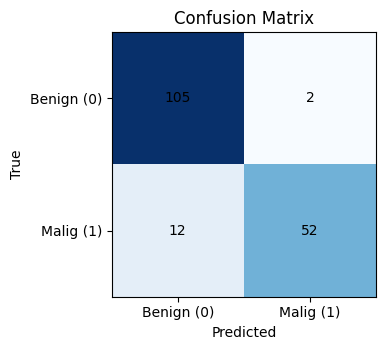

Top 10 Feature Importances:


importance
perimeter_worst         0.772325
concave points_worst    0.097133
area_se                 0.045620
texture_mean            0.034778
smoothness_worst        0.022532
concavity_mean          0.016068
area_worst              0.011544
smoothness_mean         0.000000
symmetry_mean           0.000000
concave points_mean     0.000000

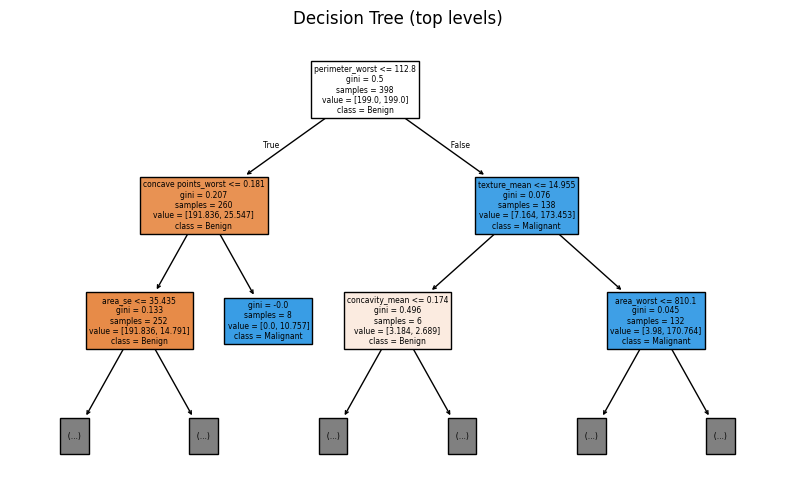

=== DecisionTree ===
Accuracy : 0.9181
Precision: 0.9630
Recall   : 0.8125
F1       : 0.8814

=== KNN ===
Accuracy : 0.9649
Precision: 1.0000
Recall   : 0.9062
F1       : 0.9508

=== RandomForest ===
Accuracy : 0.9766
Precision: 1.0000
Recall   : 0.9375
F1       : 0.9677



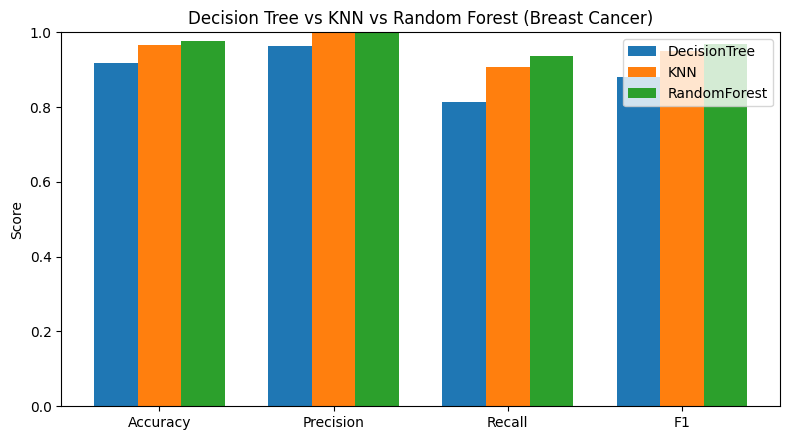

In [5]:
# === Compact Training + Evaluation + Mini-GUI (Colab) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import ipywidgets as widgets
from IPython.display import display, clear_output

# -----------------------------
# 1) PREP: map target, pick features
# -----------------------------
# Assumes df is already present with columns like:
# ['id','diagnosis','radius_mean','texture_mean', ... 'fractal_dimension_worst']
df = df.copy()

# Target: diagnosis → 1 for Malignant (M), 0 for Benign (B)
df["target"] = df["diagnosis"].map({"M": 1, "B": 0}).astype(int)

# Features: all numeric columns except id/diagnosis/target
drop_cols = [c for c in ["id", "diagnosis", "target"] if c in df.columns]
X = df.drop(columns=drop_cols + ["target"], errors="ignore")  # will re-add target below
y = df["target"]

# Safety: ensure numeric dtype (coerce errors, fill NaN)
X = X.apply(pd.to_numeric, errors="coerce").fillna(X.median(numeric_only=True))

# -----------------------------
# 2) SPLIT
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------
# 3) TRAIN + EVAL (wrapped in a function so the widget can re-run)
# -----------------------------
def train_and_eval(max_depth=4, class_weight_balanced=True):
    clear_output(wait=True)

    class_weight = "balanced" if class_weight_balanced else None
    clf = DecisionTreeClassifier(
        max_depth=max_depth, random_state=42, class_weight=class_weight
    )
    clf.fit(X_train, y_train)

    # Predict & metrics
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1  = f1_score(y_test, y_pred, zero_division=0)

    print("=== Decision Tree (Breast Cancer) ===")
    print(f"Max Depth : {max_depth}")
    print(f"Class Wt  : {'balanced' if class_weight_balanced else 'None'}")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {pre:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}\n")

    print("Classification Report:\n",
          classification_report(y_test, y_pred, target_names=["Benign (0)","Malignant (1)"], zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4.2, 3.6))
    plt.imshow(cm, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center")
    plt.xticks([0,1], ["Benign (0)","Malig (1)"])
    plt.yticks([0,1], ["Benign (0)","Malig (1)"])
    plt.tight_layout()
    plt.show()

    # Top-10 Feature Importances
    importances = pd.Series(clf.feature_importances_, index=X.columns)
    top10 = importances.sort_values(ascending=False).head(10)
    print("Top 10 Feature Importances:")
    display(top10.to_frame("importance"))

    # (Optional) Small tree sketch for intuition (depth-limited for readability)
    plt.figure(figsize=(10, 6))
    plot_tree(
        clf,
        feature_names=X.columns.tolist(),
        class_names=["Benign","Malignant"],
        filled=True,
        max_depth=min(max_depth, 2)  # show only the first 2 levels to keep it readable
    )
    plt.title("Decision Tree (top levels)")
    plt.show()

# -----------------------------
# 4) MINI-GUI (adjust max_depth & class_weight)
# -----------------------------
depth_slider = widgets.IntSlider(value=4, min=1, max=10, step=1, description="max_depth")
bal_toggle  = widgets.ToggleButton(value=True, description="class_weight=balanced")

ui = widgets.HBox([depth_slider, bal_toggle])
out = widgets.interactive_output(
    train_and_eval, {"max_depth": depth_slider, "class_weight_balanced": bal_toggle}
)

display(ui, out)

# -----------------------------
# 5) One-shot run (so you see results immediately)
# -----------------------------
train_and_eval(max_depth=4, class_weight_balanced=True)


# === KNN + RandomForest + One-Chart Comparison (Breast Cancer) ===

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

# -----------------------------

# 1) Prep: target + numeric features (self-contained)

# -----------------------------

df = df.copy()

df["target"] = df["diagnosis"].map({"M": 1, "B": 0}).astype(int)

drop_cols = [c for c in ["id", "diagnosis", "target"] if c in df.columns]

X = df.drop(columns=drop_cols, errors="ignore")

X = X.apply(pd.to_numeric, errors="coerce").fillna(X.median(numeric_only=True))

y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.30, random_state=42, stratify=y

)

# -----------------------------

# 2) Define models

#    - DT (no scaling)

#    - KNN (with scaling)

#    - RF  (no scaling)

# -----------------------------

models = {

    "DecisionTree": DecisionTreeClassifier(max_depth=4, random_state=42, class_weight="balanced"),

    "KNN": Pipeline([

        ("scaler", StandardScaler()),

        ("knn", KNeighborsClassifier(n_neighbors=7))  # tweak k if you like

    ]),

    "RandomForest": RandomForestClassifier(

        n_estimators=200, max_depth=None, random_state=42, class_weight="balanced_subsample"

    ),

}

# -----------------------------

# 3) Train, predict, collect metrics

# -----------------------------

def metrics_dict(y_true, y_pred):

    return {

        "Accuracy":  accuracy_score(y_true, y_pred),

        "Precision": precision_score(y_true, y_pred, zero_division=0),

        "Recall":    recall_score(y_true, y_pred, zero_division=0),

        "F1":        f1_score(y_true, y_pred, zero_division=0),

    }

results = {}

for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    results[name] = metrics_dict(y_test, y_pred)

# Pretty print (optional)

for name, m in results.items():

    print(f"=== {name} ===")

    for k, v in m.items():

        print(f"{k:9s}: {v:.4f}")

    print()

# -----------------------------

# 4) ONE chart: grouped bar chart of metrics across models

# -----------------------------

metrics = ["Accuracy", "Precision", "Recall", "F1"]

model_names = list(results.keys())

values = np.array([[results[m][k] for m in model_names] for k in metrics])  # shape: (4 metrics, 3 models)

x = np.arange(len(metrics))

width = 0.25

plt.figure(figsize=(8,4.5))

for i, model in enumerate(model_names):

    plt.bar(x + i*width - width, values[:, i], width, label=model)

plt.xticks(x, metrics)

plt.ylim(0, 1.0)

plt.ylabel("Score")

plt.title("Decision Tree vs KNN vs Random Forest (Breast Cancer)")

plt.legend()

plt.tight_layout()

plt.show()

